In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython import display

from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:

class memristor():
                                                                                   #Kon= -70*10**(-6)
    def __init__(self, Von = -2, Voff = 2, Ron=300000, Roff=30000000, L=3*10**(-6), Kon=-20*10**(-6), Koff=20*10**(-6), Aon=0.1, Aoff=1, a_on = 1.5*10**(-6), a_off = 1.2*10**(-9), x_c = 100, x_c_on = 10**(-6)):
    
        self.V_on = Von
        self.V_off = Voff
        self.R_on = Ron
        self.R_off = Roff
        self.x_off = L
        self.x_on = 0
        self.x = 0.5*10**(-6)
        self.K_on=Kon
        self.K_off=Koff
        self.Alpha_on=Aon
        self.Alpha_off=Aoff
        self.R = np.exp(np.log(self.R_off/self.R_on) * (self.x - self.x_on)/self.x_off) * self.R_on
        self.G_norm = 1/Ron - 1/Roff
        self.a_on = a_on
        self.a_off = a_off
        self.x_c = x_c
        self.x_c_on = x_c_on
        
    def Res(self, InVolt, dt):
        
            if (InVolt >= self.V_off):
    
                dxdt = self.K_off*((InVolt/self.V_off-1)**self.Alpha_off)
    
            if (InVolt <= self.V_on):
    
                dxdt = self.K_on*((InVolt/self.V_on-1)**self.Alpha_on)
    
            if ((self.V_on < InVolt) and (InVolt < self.V_off)):
  
                dxdt=0
  
    
            if (InVolt >= 0):
           
                self.x = self.x + dt*dxdt*np.exp(-np.exp((self.x - self.a_off)/self.x_c))
              #  self.x = self.x + dt* dxdt
        
        
            if (InVolt < 0):
       
                self.x = self.x + dt*dxdt*np.exp(-np.exp((self.a_on - self.x)/self.x_c_on));
               # self.x = self.x + dt* dxdt
            
            if (self.x>=self.x_off):

                dxdt=0
                self.x = self.x_off
    
            if (self.x<=self.x_on):
    
                dxdt = 0
                self.x = self.x_on
    
            #return self.R_on + (self.x - self.x_on)*(self.R_off - self.R_on)/(self.x_off - self.x_on)
            self.R = np.exp(np.log(self.R_off/self.R_on) * (self.x - self.x_on)/(self.x_off - self.x_on)) * self.R_on
    
    def update(self, R: float):
    
        self.R = R

    def reset(self):  
         
        self.x = 0.5*10**(-6)
        self.R = np.exp(np.log(self.R_off/self.R_on) * (self.x - self.x_on)/(self.x_off - self.x_on)) * self.R_on
    

In [3]:
dt = 0.2

memr = memristor()

impulse_length = 10.0  #длительность импулсьа
impulse_amplitude = 1.8
impulse_amplitude_2 = 1.8

k = 0.9
 
                                     

In [4]:
def impulse_curve_2(t, dt, impulse_length, impulse_amplitude): #производная импульса
        
        impulse_value = impulse_amplitude/(impulse_length - 2 * dt)/k #производная в точках, не находящихся в середине импульса
    
        impulse_bias =  (2*impulse_amplitude *(abs(t - (impulse_length * k)) < dt/2) + 2*impulse_amplitude*(abs(t - (impulse_length * k)) == dt/2)*(t < impulse_length * k))/dt
                                               
        impulse = (-impulse_value) * (t > 0) * (t < impulse_length * k) + (-impulse_value)/((1-k)/k)  * (t > impulse_length * k) + impulse_bias
        
        #impulse = (-impulse_value)/(1-k)  * (t > impulse_length * k) + impulse_bias
        
        impulse *= -1
        
        return impulse
    

In [5]:

def impulse_curve_2_integrated(k, dt, impulse_length, impulse_amplitude): # сам импульс, принимает не время, а номер шага по времени и dt, это чтобы при операциях с float меньше терять
    #информацию
    
    current = 0
    
    for i in range (k + 1):
    
        current +=  dt * impulse_curve_2(i*dt, dt, impulse_length, impulse_amplitude)
        
        #print(i*dt,'\n')
        if (i * dt >= impulse_length):
            current = 0
        
    return current
    

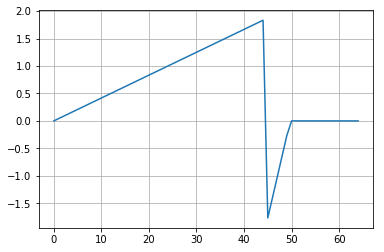

In [6]:
#строим импульс
ar = []

for i in range(int(impulse_length/dt) + 15):
    #if i:
    #    ar.append(impulse_curve_2(i * dt, dt) * dt + ar[i-1])
    #else:
    #    ar.append(impulse_curve_2(i * dt, dt) * dt)
    
    ar.append(impulse_curve_2_integrated(i , dt, impulse_length, impulse_amplitude))
    #print(i*dt,'\n')
    
      
#print(ar)    
plt.figure()
plt.plot(np.arange(int(impulse_length/dt) + 15), ar)
plt.grid()
plt.show()
ar.clear()

In [7]:
import torch

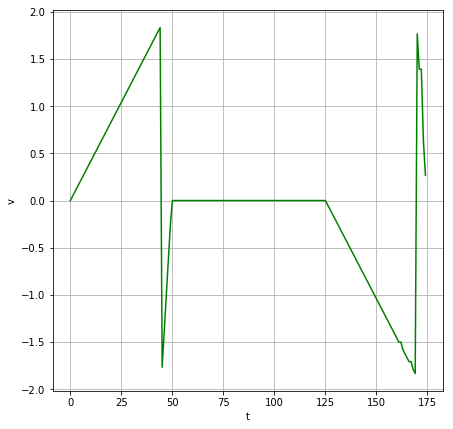

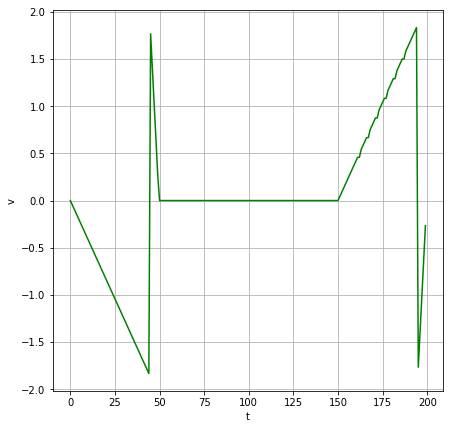

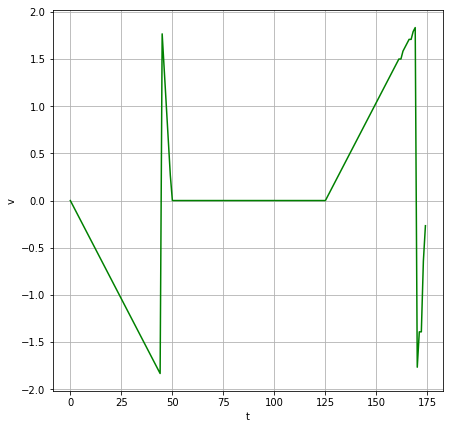

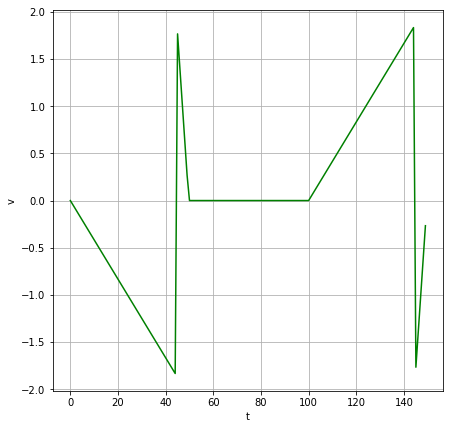

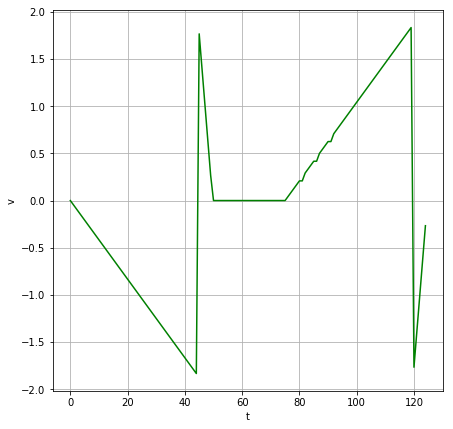

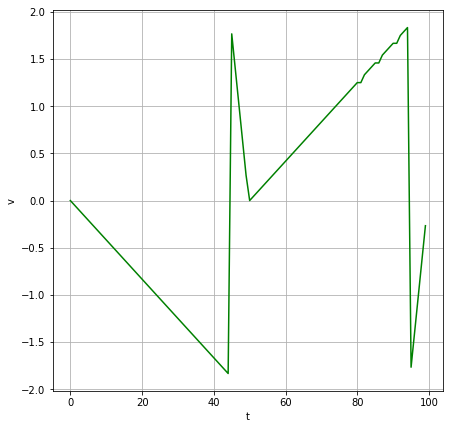

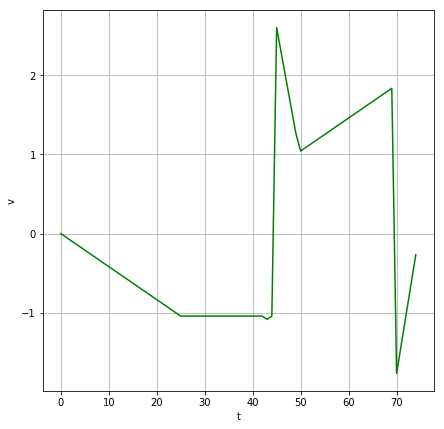

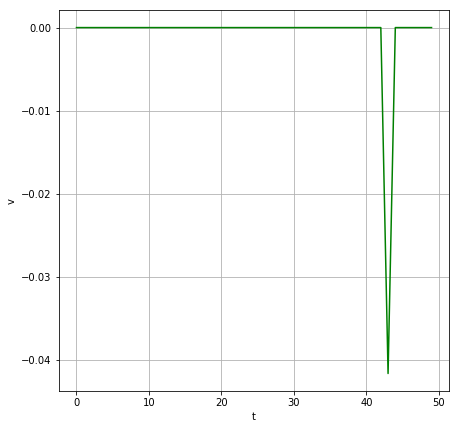

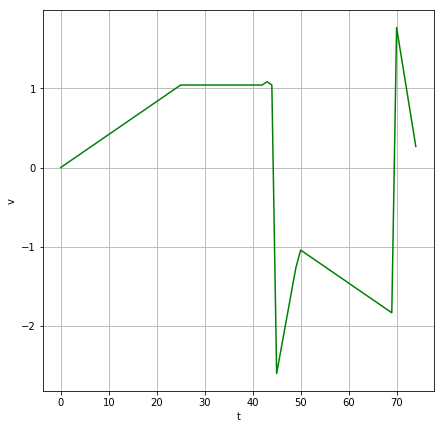

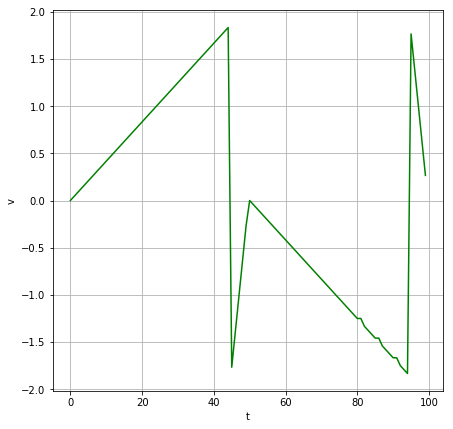

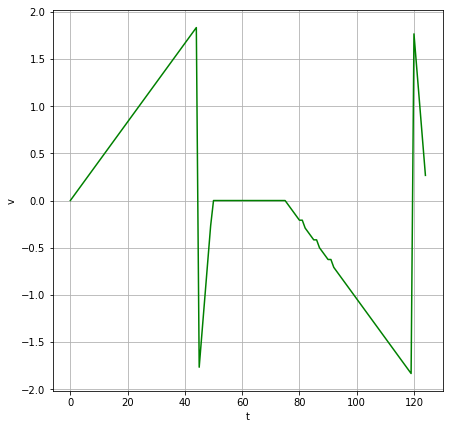

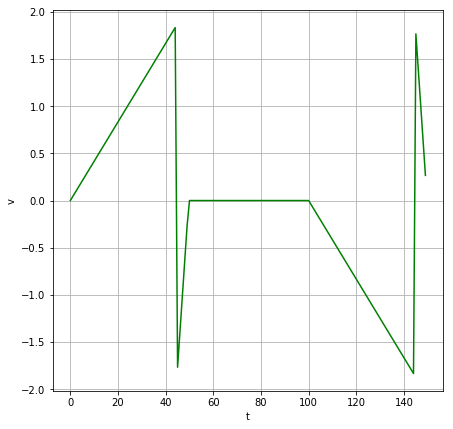

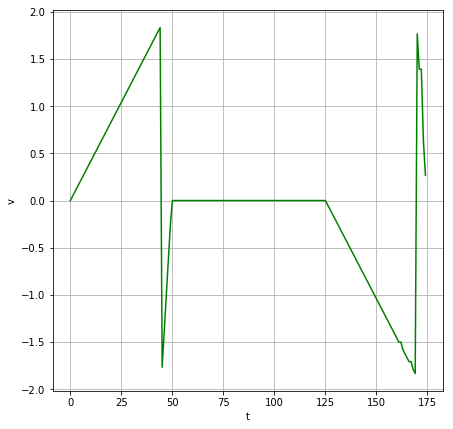

In [8]:
imp = []

pi = 3.1415/impulse_length

for count in range(-int(30/5), int(30/5)):
    
    delta_t = count * 5
    #delta_t = 2
    
    imp_current = 0
    
    for t_s in range( 0 , int((impulse_length + abs(delta_t))/dt)):
        
        t = t_s * dt
        
       # R_c = memr.R
        
        #memr.Res(impulse_curve_2_integrated(t_s, dt, impulse_length)*(t<=impulse_length) + impulse_curve_2_integrated(int((t - delta_t)/dt), dt,impulse_length)*(t>=abs(delta_t)), dt)    
        #memr.Res(np.sin(t*2*pi)*(t<=impulse_length) + np.sin((t - delta_t)*2*pi)*(t>=abs(delta_t)), dt)
        
        #delta_w_current += (1/R_c - 1/memr.R)/memr.G_norm
        #imp_current = impulse_curve_2_integrated(t_s, dt, impulse_length)*(t<=impulse_length) - impulse_curve_2_integrated(int((t - delta_t)/dt), dt,impulse_length, impulse_amplitude)*(t>=abs(delta_t))
        if (delta_t > 0):
            imp_current = impulse_curve_2_integrated(t_s, dt, impulse_length, impulse_amplitude)*(t<=impulse_length) - impulse_curve_2_integrated(int(( t - delta_t)/dt), dt,impulse_length, impulse_amplitude_2)*(t>=abs(delta_t)) 
            
        #memr.Res(np.sin(t*2*pi)*(t<=impulse_length) + np.sin((t - delta_t)*2*pi)*(t>=abs(delta_t)), dt)
        else:
            imp_current = impulse_curve_2_integrated(int(( t - abs(delta_t))/dt), dt, impulse_length, impulse_amplitude)*(t>=abs(delta_t)) - impulse_curve_2_integrated(t_s, dt,impulse_length, impulse_amplitude_2)*(t<=impulse_length)
            
        
        
        imp.append(imp_current)  

    delta_w_STDP = imp
#delta_w_STDP1 =[-1.7*(0.01 + np.exp(-d/130)) for d in delta_t]
    fig_a = plt.figure(figsize=(7,7))
    plt.plot([delta_t for delta_t in range( 0 , int((impulse_length + abs(delta_t))/dt))], delta_w_STDP, color='g')
#plt.plot(delta_t, delta_w_STDP1, label='с+', color='r')
    plt.ylabel('v')
    plt.xlabel('t')
#plt.legend(loc='best')
   # plt.xlim(0, 140)
    plt.grid()
    display.clear_output(wait=True)
    display.display(fig_a, display_id = 'imp')

    imp.clear()
    
    #plt.close(fig_a)

In [9]:
#Промеряем STDP
delta_w = []
R_arch = []



pi = 3.1415/impulse_length

for count in range(int(-30/dt), int(30/dt)):
    
    delta_t = count * dt
#delta_t = 2
    
    #delta_w_current = 0
    
    R_c = memr.R
    
    for t_s in range( 0 , int((impulse_length + abs(delta_t))/dt)):
        
        t = t_s * dt
        
        #R_c = memr.R
        if (delta_t > 0):
            memr.Res(impulse_curve_2_integrated(t_s, dt, impulse_length, impulse_amplitude)*(t<=impulse_length) - impulse_curve_2_integrated(int(( t - delta_t)/dt), dt,impulse_length, impulse_amplitude_2)*(t>=abs(delta_t)), dt) 
            
        #memr.Res(np.sin(t*2*pi)*(t<=impulse_length) + np.sin((t - delta_t)*2*pi)*(t>=abs(delta_t)), dt)
        
        else:
            memr.Res(impulse_curve_2_integrated(int(( t - abs(delta_t))/dt), dt, impulse_length, impulse_amplitude)*(t>=abs(delta_t)) - impulse_curve_2_integrated(t_s, dt,impulse_length, impulse_amplitude_2)*(t<=impulse_length), dt)
            
    delta_w_current = (1/memr.R - 1/R_c)/memr.G_norm
    
        #delta_w_current = impulse_curve_2_integrated(t_s, dt, impulse_length)*(t<=impulse_length) + impulse_curve_2_integrated(int((t - delta_t)/dt), dt,impulse_length)*(t>=abs(delta_t))
        
        
        
    delta_w.append(delta_w_current)  
    memr.reset()
    
"""
delta_w_STDP = delta_w
#delta_w_STDP1 =[-1.7*(0.01 + np.exp(-d/130)) for d in delta_t]
plt.figure(figsize=(7,7))
plt.plot([delta_t for delta_t in range( 0 , int((impulse_length + abs(delta_t))/dt))], delta_w_STDP, color='g')
#plt.plot(delta_t, delta_w_STDP1, label='с+', color='r')
plt.ylabel('delta_w')
plt.xlabel('delta_t')
#plt.legend(loc='best')
plt.xlim(0, 130)
plt.grid()
plt.show()
"""
pass

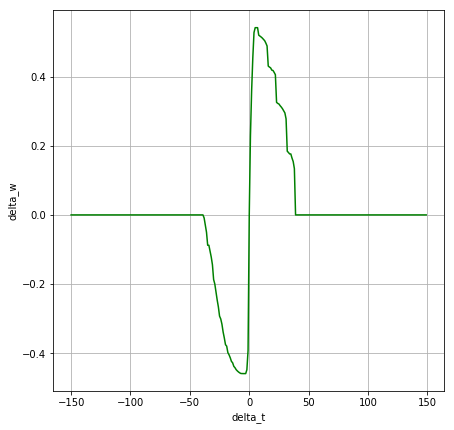

In [10]:
#Строим STDP

delta_w_STDP =delta_w
#delta_w_STDP1 =[-1.7*(0.01 + np.exp(-d/130)) for d in delta_t]
plt.figure(figsize=(7,7))
plt.plot([delta_t for delta_t in range(int(-30/dt), int(30/dt))], delta_w_STDP, color='g')
#plt.plot(delta_t, delta_w_STDP1, label='с+', color='r')
plt.ylabel('delta_w')
plt.xlabel('delta_t')
#plt.legend(loc='best')
#plt.xlim(-60, 60)
plt.grid()
plt.show()
delta_w.clear()

#

In [11]:
memr.reset()
(1/memr.R)/memr.G_norm

0.46884735693058366

In [12]:
0.5

0.5